In [1]:
# imports
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

print(torch.__version__)
print(torchvision.__version__)

train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()
                                                                                         ])
)

# class definition


def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()


class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t,dim=1)

        return t

def get_all_preds(model,loader):
    all_preds = torch.tensor([])    #create tensor to store all predictions in
    for batch in loader:    #iterate per batch
        images, labels = batch  #take out images and labels

    #version 1.1
        preds = model(images)   #run the images in this batch through the model, create predictions
        all_preds = torch.cat(  #concatenate these predictions to the all_preds tensor
            (all_preds, preds)
            ,dim=0
    )
 
    #version 1.2 
    #     with torch.no_grad():

    #         preds = model(images)   #run the images in this batch through the model, create predictions
    #         all_preds = torch.cat(  #concatenate these predictions to the all_preds tensor
    #             (all_preds, preds)
    #             ,dim=0
    #     )
    return all_preds

# computations first time to train
network = Network()  # create network
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimiser = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(5):

    total_loss = 0
    total_correct = 0

    for batch in train_loader:  # get batch
        images, labels = batch  # define images and labels

        preds = network(images)  # create first predictions
        loss = F.cross_entropy(preds, labels)  # calculate loss

        optimiser.zero_grad()
        loss.backward()  # calculate gradient
        optimiser.step()  # update weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
    
    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

print(total_correct/len(train_set)) 

#second time to compute entire predictions unit, not training extra
with torch.no_grad():   #version 2.1
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000) #the data loader
    train_preds = get_all_preds(network,prediction_loader)

#version 2.2
# prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000) #the data loader
# with torch.no_grad():
#     train_preds = get_all_preds(network,prediction_loader)

#version 2.3
# prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000) #the data loader
# train_preds = get_all_preds(network,prediction_loader)

preds_correct = get_num_correct(train_preds,train_set.targets)

print(train_preds.shape)
print(train_preds.requires_grad)
print(train_preds.grad)
print(train_preds.grad_fn)

print("total correct:",preds_correct)
print("accuracy:", preds_correct/len(train_set))

# with torch.no_grad():
#     prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
#     train_preds = get_all_preds(network,prediction_loader)

# print(train_preds.requires_grad)
# print(train_preds.grad)

1.5.1
0.6.1
epoch: 0 total_correct: 47711 loss: 328.69152891635895
epoch: 1 total_correct: 51552 loss: 227.1384337246418
epoch: 2 total_correct: 52223 loss: 206.01384443044662
epoch: 3 total_correct: 52598 loss: 196.66941310465336
epoch: 4 total_correct: 52921 loss: 191.75775282084942
0.8820166666666667
torch.Size([60000, 10])
False
None
None
total correct: 52846
accuracy: 0.8807666666666667


In [2]:
#Confusion matrix
stacked = torch.stack(  #for each prediction, couple it to the label it was supposed to have
    (
        train_set.targets
        ,train_preds.argmax(dim=1)  #why dim=1? Taking maximum value of this dimension, you have 60000x10, and the 10 should be maxed. Just make sure to keep paying attention to this
    )
    ,dim=1
)

cmt = torch.zeros(10,10,dtype=torch.int32)

In [3]:
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [4]:
for p in stacked:
    j, k = p.tolist()
    cmt[j,k]=cmt[j,k]+1
    
cmt

tensor([[5478,    2,   65,   84,   21,    4,  285,    0,   61,    0],
        [  10, 5831,    1,  124,    8,    1,   16,    0,    9,    0],
        [ 107,    1, 4503,   59, 1006,    2,  292,    0,   30,    0],
        [ 258,   15,   16, 5519,  119,    0,   71,    0,    2,    0],
        [   8,    2,  236,  283, 5190,    0,  262,    0,   19,    0],
        [   1,    0,    0,    1,    0, 5512,    0,  261,   29,  196],
        [1342,    4,  451,  125,  697,    0, 3277,    0,  103,    1],
        [   0,    0,    0,    0,    0,   23,    0, 5823,   18,  136],
        [  26,    5,    4,   22,   15,    3,   20,    3, 5902,    0],
        [   0,    0,    0,    0,    0,    2,    0,  180,    7, 5811]], dtype=torch.int32)

In [6]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from resources.plotcm import plot_confusion_matrix

In [7]:
cm = confusion_matrix(train_set.targets,train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5478,    2,   65,   84,   21,    4,  285,    0,   61,    0],
       [  10, 5831,    1,  124,    8,    1,   16,    0,    9,    0],
       [ 107,    1, 4503,   59, 1006,    2,  292,    0,   30,    0],
       [ 258,   15,   16, 5519,  119,    0,   71,    0,    2,    0],
       [   8,    2,  236,  283, 5190,    0,  262,    0,   19,    0],
       [   1,    0,    0,    1,    0, 5512,    0,  261,   29,  196],
       [1342,    4,  451,  125,  697,    0, 3277,    0,  103,    1],
       [   0,    0,    0,    0,    0,   23,    0, 5823,   18,  136],
       [  26,    5,    4,   22,   15,    3,   20,    3, 5902,    0],
       [   0,    0,    0,    0,    0,    2,    0,  180,    7, 5811]],
      dtype=int64)

Confusion matrix, without normalization
[[5478    2   65   84   21    4  285    0   61    0]
 [  10 5831    1  124    8    1   16    0    9    0]
 [ 107    1 4503   59 1006    2  292    0   30    0]
 [ 258   15   16 5519  119    0   71    0    2    0]
 [   8    2  236  283 5190    0  262    0   19    0]
 [   1    0    0    1    0 5512    0  261   29  196]
 [1342    4  451  125  697    0 3277    0  103    1]
 [   0    0    0    0    0   23    0 5823   18  136]
 [  26    5    4   22   15    3   20    3 5902    0]
 [   0    0    0    0    0    2    0  180    7 5811]]


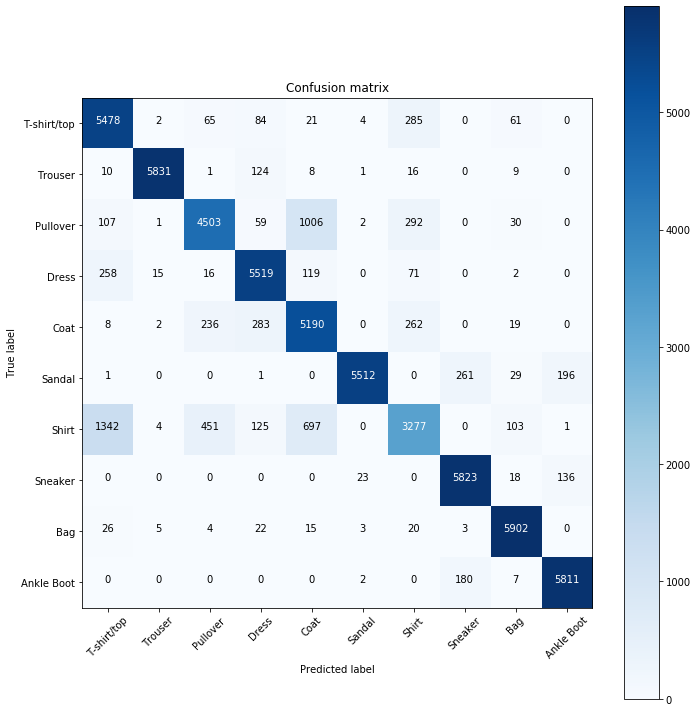

In [8]:
names = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm,names)